In [39]:
#for agricultural land area dataset
import pandas as pd

def clean_dataset(file_path):
    # Load the dataset from the specified Excel file
    agri_df = pd.read_excel(file_path)
    
    # Selecting and renaming specific columns
    agri_df = agri_df[['GEO_AREA_NAME', 'TIME_PERIOD', 'OBS_VALUE']].copy()
    agri_df.rename(columns={
        'GEO_AREA_NAME': 'Area',
        'TIME_PERIOD': 'Time period',
        'OBS_VALUE': 'Proportion of Agricultural Land (%)'
    }, inplace=True)
    
    # Cleaning the data
    # 1. Dropping rows with missing values in the target column
    agri_df.dropna(subset=['Proportion of Agricultural Land (%)'], inplace=True)
    
    # 2. Removing duplicate rows, if any
    agri_df.drop_duplicates(inplace=True)
    
    return agri_df

file_path = r'Uncleaned\arigri space used_2023_1710.xlsx'
cleaned_agri_df = clean_dataset(file_path)

# Saving the cleaned dataset to a new Excel file
cleaned_agri_df.to_excel('cleaned\cleaned_agri_space_2023.xlsx', index=False)

# Displaying the first few rows of the cleaned DataFrame
print(cleaned_agri_df.head())


                                Area  Time period  \
0                            Bahrain         2019   
7   Bolivia (Plurinational State of)         2015   
13                          Bulgaria         2020   
16                           Belarus         2021   
21                            Canada         2021   

    Proportion of Agricultural Land (%)  
0                                  87.0  
7                                  14.0  
13                                  4.0  
16                                 62.0  
21                                 71.0  


In [40]:
# for food food loss percent dataset
import pandas as pd

def clean_food_loss_dataset(original_file_path, cleaned_file_path):
    # Load the dataset from the specified Excel file
    food_loss_df = pd.read_excel(original_file_path)
    
    # Selecting relevant columns and renaming them for clarity
    food_loss_df = food_loss_df[['GEO_AREA_NAME', 'TIME_PERIOD', 'OBS_VALUE']].copy()
    food_loss_df.rename(columns={
        'GEO_AREA_NAME': 'Area',
        'TIME_PERIOD': 'Time period',
        'OBS_VALUE': 'Food Loss (in percent)'
    }, inplace=True)
    
    # Drop rows with missing values in 'Food Loss (in percent)'
    food_loss_df.dropna(subset=['Food Loss (in percent)'], inplace=True)

    # Remove any duplicate entries in the dataset
    food_loss_df.drop_duplicates(inplace=True)
    
    # Save the cleaned dataframe to a new Excel file
    food_loss_df.to_excel(cleaned_file_path, index=False)
    
    return food_loss_df.head()

original_file_path = r'Uncleaned/food_loss_percentage_2023_0509.xlsx'
cleaned_file_path = 'cleaned/cleaned_food_loss_percentage.xlsx'

cleaned_food_loss_head = clean_food_loss_dataset(original_file_path, cleaned_file_path)
print(cleaned_food_loss_head)


             Area  Time period  Food Loss (in percent)
0           World         2016                   13.00
1           World         2020                   13.30
2           World         2021                   13.23
3  Western Europe         2016                    6.20
4  Western Europe         2020                    6.50


In [41]:
# for food insecurity dataset
import pandas as pd

def clean_food_insecurity_dataset(original_file_path, cleaned_file_path):
    # Load the dataset
    original_df = pd.read_excel(original_file_path)
    
    # Selecting relevant columns
    food_insecurity_df = original_df[['GEO_AREA_NAME', 'TIME_PERIOD', 'OBS_VALUE']].copy()
    
    # Renaming columns for clarity
    food_insecurity_df.rename(columns={
        'GEO_AREA_NAME': 'Area',
        'TIME_PERIOD': 'Time period',
        'OBS_VALUE': 'Avg Population in Severe Food Insecurity (thousands)'
    }, inplace=True)
    
    # Remove duplicates and any rows with missing values
    food_insecurity_df.drop_duplicates(inplace=True)
    food_insecurity_df.dropna(subset=['Avg Population in Severe Food Insecurity (thousands)'], inplace=True)

    # Save the cleaned dataset
    food_insecurity_df.to_excel(cleaned_file_path, index=False)
    
    return food_insecurity_df.head()

# Define file paths
original_file_path = r'Uncleaned/2.1.2-Population in severe food insecurity (number)_2023_1710.xlsx'
cleaned_file_path = 'cleaned/cleaned_food_insecurity_data.xlsx'

# Clean the dataset and display the first few rows
cleaned_food_insecurity_dataset_head = clean_food_insecurity_dataset(original_file_path, cleaned_file_path)
print(cleaned_food_insecurity_dataset_head)


    Area  Time period Avg Population in Severe Food Insecurity (thousands)
0  World         2015                                           561470.1  
1  World         2016                                           594912.8  
2  World         2017                                           623769.4  
3  World         2018                                           689428.4  
4  World         2019                                           719838.3  


In [42]:
# for water stress in percent 
import pandas as pd

def clean_water_stress_dataset(original_file_path, cleaned_file_path):
    # Load the original dataset
    water_stress_data = pd.read_excel(original_file_path)
    
    # Selecting relevant columns and renaming them for clarity
    water_stress_cleaned = water_stress_data[['GEO_AREA_NAME', 'TIME_PERIOD', 'OBS_VALUE']].copy()
    water_stress_cleaned.rename(columns={
        'GEO_AREA_NAME': 'Area',
        'TIME_PERIOD': 'Time period',
        'OBS_VALUE': 'Water Stress Level (%)'
    }, inplace=True)
    
    # Dropping rows with missing values specifically in 'Water Stress Level (%)' column
    water_stress_cleaned.dropna(subset=['Water Stress Level (%)'], inplace=True)
    
    # Removing duplicate entries if any
    water_stress_cleaned = water_stress_cleaned.drop_duplicates()
    water_stress_cleaned.to_excel(cleaned_file_path, index=False)
    
    return water_stress_cleaned.head()

# Define paths to the original and cleaned datasets
original_file_path = r'Uncleaned/h2o_stress_2023_1710.xlsx'
cleaned_file_path = 'cleaned/cleaned_h2o_stress_2023.xlsx'

# Execute the cleaning function and display the first few rows of the cleaned dataset
cleaned_water_stress_dataset_head = clean_water_stress_dataset(original_file_path, cleaned_file_path)
print(cleaned_water_stress_dataset_head)



     Area  Time period  Water Stress Level (%)
0   World         2020                   18.24
16  World         2015                   18.03
17  World         2016                   18.22
18  World         2017                   18.34
19  World         2018                   18.30


In [43]:
#for world indicator dataset
import pandas as pd
import numpy as np

# Load the original dataset
original_wdi_path = 'Uncleaned/World_Development_Indicators.csv'
wdi_df = pd.read_csv(original_wdi_path)

# Remove any initial rows that don't contain actual data
wdi_df = wdi_df[~wdi_df['Series Name'].str.contains('Data from database:', na=False)]

# Reshape the dataset
wdi_pivoted = wdi_df.melt(id_vars=['Country Name', 'Series Name', 'Series Code'],
                          var_name='Year',
                          value_name='Value')

# Extract the year and convert to float
wdi_pivoted['Year'] = wdi_pivoted['Year'].str.extract('(\d{4})').astype(float)

# Pivot to transform indicators into columns
cleaned_wdi_data = wdi_pivoted.pivot_table(index=['Country Name', 'Year'],
                                           columns='Series Name',
                                           values='Value',
                                           aggfunc='first').reset_index()

# Rename columns to enhance readability
cleaned_wdi_data.rename(columns={
    'Country Name': 'Area',
    'Year': 'Time period',
    # Potentially add more renaming based on specific indicators
}, inplace=True)

# Cleaning data
# Trim whitespace in string columns
for col in cleaned_wdi_data.select_dtypes(include=['object']).columns:
    cleaned_wdi_data[col] = cleaned_wdi_data[col].str.strip()

# Fill or drop NaN values based on specific requirements
cleaned_wdi_data.fillna(value=np.nan, inplace=True)
# cleaned_wdi_data.dropna(subset=['KeyColumn'], inplace=True)  # Optional: drop rows where 'KeyColumn' is NaN

# Remove duplicate rows
cleaned_wdi_data.drop_duplicates(inplace=True)

# Save the transformed and cleaned dataset
transformed_wdi_path = 'cleaned/final_transformed_WDI_2023.csv'
cleaned_wdi_data.to_csv(transformed_wdi_path, index=False)

# Display the first few rows to verify the transformation
print(cleaned_wdi_data.head())



Series Name         Area  Time period  \
0            Afghanistan       2013.0   
1            Afghanistan       2014.0   
2            Afghanistan       2015.0   
3            Afghanistan       2016.0   
4            Afghanistan       2017.0   

Series Name Access to clean fuels and technologies for cooking (% of population)  \
0                                                         24.3                     
1                                                         25.7                     
2                                                        27.25                     
3                                                         28.5                     
4                                                           30                     

Series Name Access to clean fuels and technologies for cooking, rural (% of rural population)  \
0                                                          8.9                                  
1                                                     

In [44]:
#  merging all FAO datasets
import pandas as pd

# Load the datasets
agri_space_df = pd.read_excel('cleaned/cleaned_agri_space_2023.xlsx')
food_insecurity_df = pd.read_excel('cleaned/cleaned_food_insecurity_data.xlsx')
food_loss_percentage_df = pd.read_excel('cleaned/cleaned_food_loss_percentage.xlsx')
h2o_stress_df = pd.read_excel('cleaned/cleaned_h2o_stress_2023.xlsx')

merged_df = pd.merge(agri_space_df, food_insecurity_df, on=['Area', 'Time period'], how='outer')
merged_df = pd.merge(merged_df, food_loss_percentage_df, on=['Area', 'Time period'], how='outer')
merged_df = pd.merge(merged_df, h2o_stress_df, on=['Area', 'Time period'], how='outer')


threshold = len(merged_df.columns) * 0.5  # 50% of the number of columns
merged_df.dropna(thresh=threshold, inplace=True)

# Basic data cleaning before saving
merged_df.fillna(0, inplace=True)

# Save the final merged dataset to an Excel file
final_merged_dataset_path = 'Output/final_merged_dataset_FAO_2023.xlsx'
merged_df.to_excel(final_merged_dataset_path, index=False)

# Display the first few rows to verify the merge
print(merged_df.head())


          Area  Time period  Proportion of Agricultural Land (%)  \
0  Afghanistan         2000                                  0.0   
1  Afghanistan         2000                                  0.0   
2  Afghanistan         2000                                  0.0   
3  Afghanistan         2000                                  0.0   
4  Afghanistan         2001                                  0.0   

  Avg Population in Severe Food Insecurity (thousands)  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Food Loss (in percent)  Water Stress Level (%)  
0                     0.0                   54.76  
1                     0.0                   53.99  
2                     0.0                    0.35  
3                     0.0         

In [45]:
# preprocessing
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_lg')

# Your predefined keywords
predefined_keywords = ['gdp', 'food', 'environment', 'water', 'agricultural', 'energy', 'economic', 'health', 'emissions', 'policy', 'co2']

def find_similar_keywords(file_path, keywords):
    if file_path.endswith('.xlsx'):
        analyzed_data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        analyzed_data = pd.read_csv(file_path)
    else:
        raise ValueError("Unsupported file format")

    # Create spaCy objects for the predefined keywords
    keyword_tokens = [nlp(keyword) for keyword in keywords]

    # Extract column names,
    column_words = set(word.lower() for col in analyzed_data.columns for word in col.replace('_', ' ').split())

    # Filter out numeric 
    column_words = {word for word in column_words if not word.isdigit() and len(word) > 1}
    similar_words = {}

    # Compare each word in the columns to the predefined keywords
    for word in column_words:
        word_token = nlp(word)
        for keyword_token in keyword_tokens:
            similarity = word_token.similarity(keyword_token)
            # If the similarity is above a threshold (e.g., 0.6), add it to the similar words
            if similarity > 0.6:
                similar_words[word] = max(similarity, similar_words.get(word, 0))

    # Sort words by similarity score
    sorted_similar_words = sorted(similar_words.items(), key=lambda x: x[1], reverse=True)

    return [word for word, _ in sorted_similar_words]

all_files = ['Output/final_merged_dataset_FAO_2023.xlsx', 'cleaned/final_transformed_WDI_2023.csv']  # Replace with your actual file paths
all_similar_keywords = []
for file_path in all_files:
    all_similar_keywords.extend(find_similar_keywords(file_path, predefined_keywords))

print("All similar keywords:", set(all_similar_keywords))


C:\Users\shiva\AppData\Local\Temp\ipykernel_30292\3601889482.py:14: DtypeWarning: Columns (444,445,531,532,533) have mixed types. Specify dtype option on import or set low_memory=False.
  analyzed_data = pd.read_csv(file_path)
C:\Users\shiva\AppData\Local\Temp\ipykernel_30292\3601889482.py:32: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = word_token.similarity(keyword_token)


All similar keywords: {'macroeconomic', 'cropland', 'construction', 'unemployment,', 'development', 'technologies', 'renewable', 'guideline', 'arable', 'sector', 'co2', 'government', 'sectors,', 'water', 'imports', 'fuel', 'residential', 'forestry,', 'freshwater', 'carbon', 'distribution', 'consumption', 'elevation', 'areas', 'industries', 'agriculture', 'industry', 'methodology', 'inventories', 'environmental', 'protection', 'irrigated', 'agricultural', 'structural', 'precipitation', 'mobilization', 'population', 'emission', 'quality', 'reproductive', 'formation,', 'policy', 'sustainability', 'resources,', 'import', 'gdp', 'population,', 'efficiency', 'productivity,', 'unemployment', 'institutions', 'resource', 'rural', 'exports', 'intermediate', 'education,', 'power', 'internal', 'production', 'manufacturing,', 'energy', 'policies', 'accountability,', 'emissions', 'particulate', 'agriculture,', 'environment', 'allocation', 'governance', 'food,', 'transmission', 'production,', 'greenh

In [46]:
#combining and preprocessing
import pandas as pd

# Function to request user confirmation for removing rows
def request_confirmation(removed_items, item_type):
    print(f"The following {item_type} have more than 50% missing values and are suggested for removal:")
    print(removed_items)
    confirmation = input(f"Do you want to proceed with removing these {item_type}? (yes/no): ")
    return confirmation.lower() == 'yes'

# Load the FAO and WDI datasets
fao_df = pd.read_excel('Output/final_merged_dataset_FAO_2023.xlsx', engine='openpyxl')
wdi_df = pd.read_csv('cleaned/final_transformed_WDI_2023.csv')

# Add 'FAO_' prefix to the FAO dataset columns except 'Area' and 'Time period'
fao_df.columns = ['FAO_' + col if col not in ['Area', 'Time period'] else col for col in fao_df.columns]

# Perform an outer merge on 'Area' and 'Time period'
final_combined_df = pd.merge(fao_df, wdi_df, on=['Area', 'Time period'], how='outer')

# Ensure 'Area' and 'Time period' are not null
final_combined_df = final_combined_df.dropna(subset=['Area', 'Time period'])

# Remove duplicate attributes
final_combined_df = final_combined_df.loc[:,~final_combined_df.columns.duplicated()]

# Extend the list of relevant keywords
relevant_keywords = [
    'gdp', 'food', 'environment', 'water', 'Agricultural', 'Access', 'Forest' , 
    'political', 'policy', 'sustainability', 'energy', 'co2', 'electricity' ,
    'economic', 'trade', 'health', 'nutrition', 'emissions', 'Regulatory' , 'CPIA'
]

# Filter dataset for relevant attributes based on keywords
relevant_attributes = [col for col in final_combined_df.columns if any(keyword in col.lower() for keyword in relevant_keywords)]
relevant_attributes.extend(['Area', 'Time period'])  # Ensure primaries are included

filtered_data = final_combined_df[relevant_attributes].drop_duplicates()

# Identify rows with more than 50% missing values
rows_to_remove = filtered_data[filtered_data.isnull().mean(axis=1) > 0.5]

# User confirmation for removing rows
if request_confirmation(rows_to_remove[['Area', 'Time period']], 'rows'):
    filtered_data = filtered_data.drop(rows_to_remove.index)

# Save the cleaned and filtered dataset
filtered_data.to_csv('Output/final_combined_dataset_2023.csv', index=False)

# Analyzing the dataset post-cleaning
year_ranking = filtered_data.groupby('Time period').apply(lambda x: (1 - x.isnull().mean()).mean()).sort_values(ascending=False)

# Identify areas with the most missing data
area_missing_data = filtered_data.groupby('Area').apply(lambda x: x.isnull().mean().mean()).sort_values(ascending=False)

print("Year Ranking (Most to Least Complete):", year_ranking)
print("Areas with Most Missing Data:", area_missing_data)

# Display the final list of attributes, and the unique years and areas retained
kept_attributes = filtered_data.columns.tolist()
kept_years = filtered_data['Time period'].dropna().unique().tolist()
kept_areas = filtered_data['Area'].dropna().unique().tolist()

print("Kept Attributes:", kept_attributes)
print("Kept Years:", kept_years)
print("Kept Areas:", kept_areas)


C:\Users\shiva\AppData\Local\Temp\ipykernel_30292\1217923613.py:13: DtypeWarning: Columns (444,445,531,532,533) have mixed types. Specify dtype option on import or set low_memory=False.
  wdi_df = pd.read_csv('cleaned/final_transformed_WDI_2023.csv')


The following rows have more than 50% missing values and are suggested for removal:
              Area  Time period
0      Afghanistan       2000.0
1      Afghanistan       2000.0
2      Afghanistan       2000.0
3      Afghanistan       2000.0
4      Afghanistan       2001.0
...            ...          ...
22170     Zimbabwe       2011.0
22171     Zimbabwe       2012.0
22172     Zimbabwe       2012.0
22173     Zimbabwe       2012.0
22174     Zimbabwe       2012.0

[11792 rows x 2 columns]
Year Ranking (Most to Least Complete): Time period
2020.0    0.998358
2019.0    0.998284
2018.0    0.998218
2017.0    0.998145
2015.0    0.998078
2016.0    0.998074
2014.0    0.996694
2013.0    0.996437
2021.0    0.993077
2022.0    0.978417
dtype: float64
Areas with Most Missing Data: Area
Latin America & Caribbean (excluding high income)    0.023077
Not classified                                       0.023077
Hong Kong SAR, China                                 0.023077
New Caledonia                

C:\Users\shiva\AppData\Local\Temp\ipykernel_30292\1217923613.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  year_ranking = filtered_data.groupby('Time period').apply(lambda x: (1 - x.isnull().mean()).mean()).sort_values(ascending=False)
C:\Users\shiva\AppData\Local\Temp\ipykernel_30292\1217923613.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  area_missing_data = filtered_data.groupby('Area').app

In [1]:
# Semantic filtering of dataset
import pandas as pd
import spacy

# Load spaCy's language model
nlp = spacy.load('en_core_web_lg')

# Define your domain-specific keywords
domain_keywords = [
    'gdp', 'food', 'environment', 'water', 'agricultural', 'access', 'forest',
    'political', 'policy', 'sustainability', 'energy', 'co2', 'electricity',
    'economic', 'trade', 'health', 'nutrition', 'emissions', 'regulatory', 'cpia'
]

# Load your dataset with low_memory=False to avoid mixed types warning
combined_dataset = pd.read_csv('Output/final_combined_dataset_2023.csv', low_memory=False)

# Function to calculate semantic similarity
def calculate_similarity(attribute, domain_keywords):
    attribute_token = nlp(attribute)
    return max(attribute_token.similarity(nlp(keyword)) for keyword in domain_keywords)

# Evaluate columns based on thresholds
def evaluate_columns(combined_dataset, domain_keywords, similarity_threshold, missing_data_threshold):
    columns_relevance = {}
    for col in combined_dataset.columns:
        col_cleaned = col.replace('_', ' ').lower()  # Clean up column name
        similarity = calculate_similarity(col_cleaned, domain_keywords)
        missing_data_ratio = combined_dataset[col].isnull().mean()

        if similarity >= similarity_threshold and missing_data_ratio <= missing_data_threshold:
            columns_relevance[col] = similarity

    sorted_columns = sorted(columns_relevance.items(), key=lambda x: x[1], reverse=True)
    return [col for col, _ in sorted_columns]

# Set your desired thresholds here
similarity_threshold = 0.5  
missing_data_threshold = 0.6 

# Get the top columns based on the thresholds
top_columns = evaluate_columns(combined_dataset, domain_keywords, similarity_threshold, missing_data_threshold)

print("Top relevant columns with less missing data:", top_columns)


C:\Users\shiva\AppData\Local\Temp\ipykernel_57464\2796052525.py:20: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return max(attribute_token.similarity(nlp(keyword)) for keyword in domain_keywords)


Top relevant columns with less missing data: ['CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)', 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)', 'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources', 'Political Stability and Absence of Violence/Terrorism: Percentile Rank', 'Political Stability and Absence of Violence/Terrorism: Estimate', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Political Stability and Absence of Violence/Terrorism: Number of Sources', 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)', 'Political Stability and Absence of Violence/Terrorism: Standard Error', 'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)', 'CO2 emissions from manufacturing industries and construction (% of total fuel c

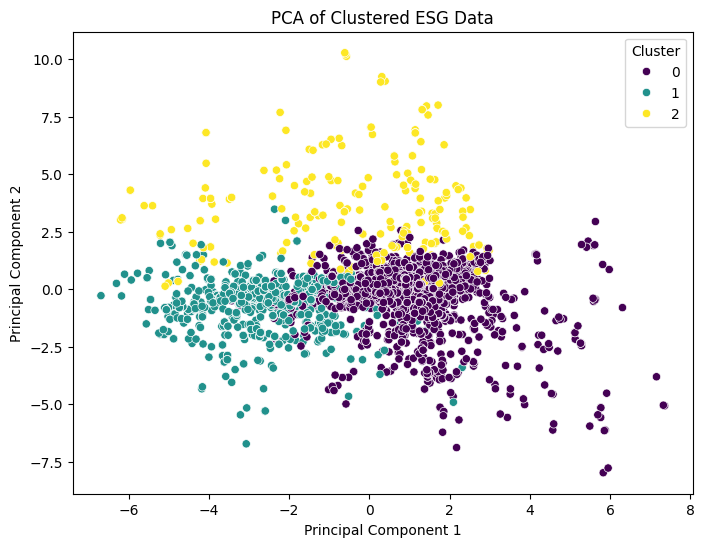

Countries and their Cluster Assignments:
                             Area  Cluster
0                     Afghanistan        1
20                    Afghanistan        0
24    Africa Eastern and Southern        1
33    Africa Eastern and Southern        0
34     Africa Western and Central        1
...                           ...      ...
3708                       Zambia        2
3713                       Zambia        1
3728                       Zambia        0
3732                     Zimbabwe        1
3755                     Zimbabwe        0

[388 rows x 2 columns]


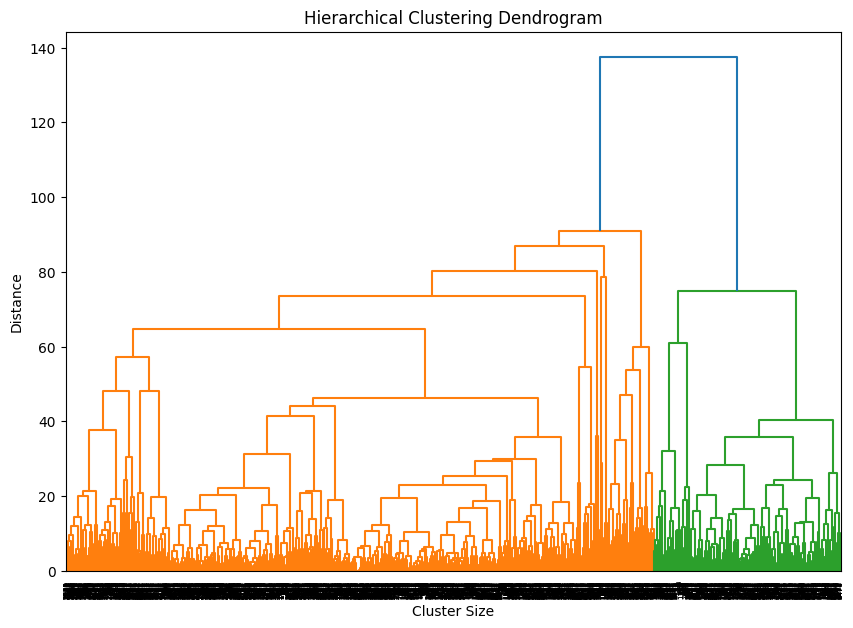

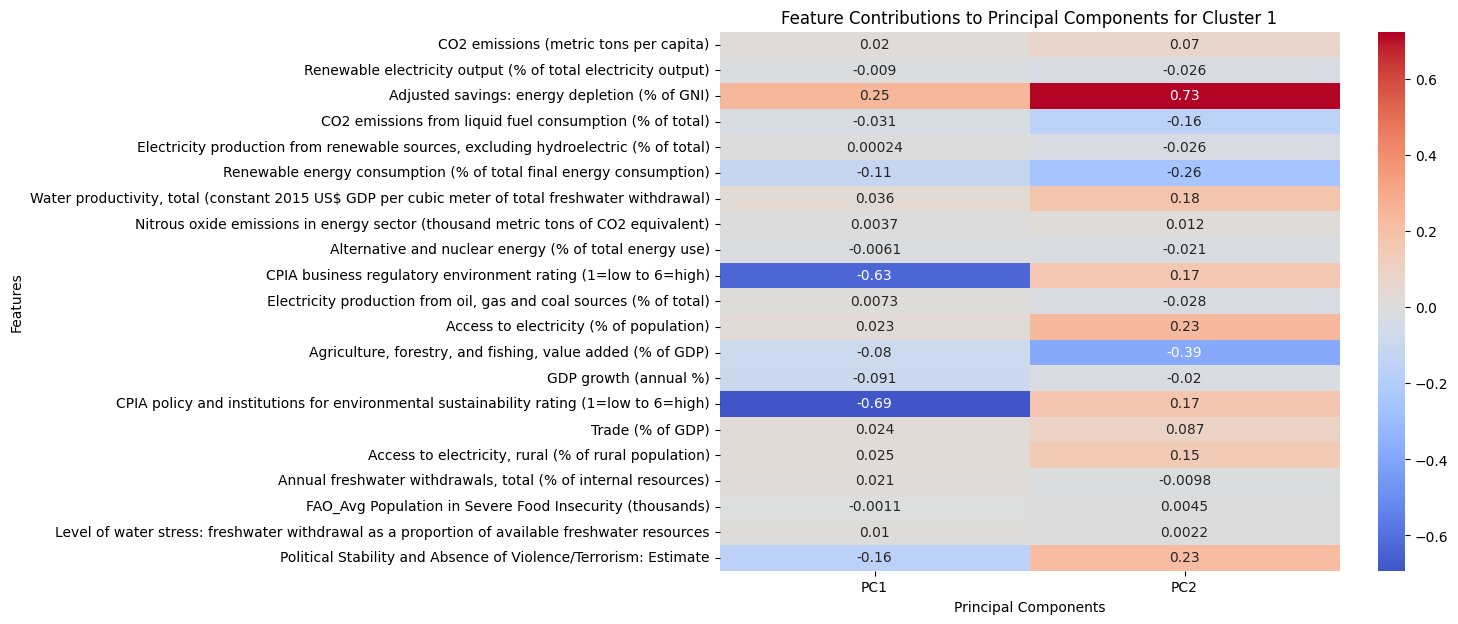

Top contributing features to Principal Component 1 for Cluster 1:
Adjusted savings: energy depletion (% of GNI)                                                       0.246433
Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)    0.035566
Access to electricity, rural (% of rural population)                                                0.024544
Trade (% of GDP)                                                                                    0.023704
Access to electricity (% of population)                                                             0.022812
Name: PC1, dtype: float64
Top contributing features to Principal Component 2 for Cluster 1:
Adjusted savings: energy depletion (% of GNI)                                                       0.725053
Access to electricity (% of population)                                                             0.234522
Political Stability and Absence of Violence/Terrorism: Estimate                

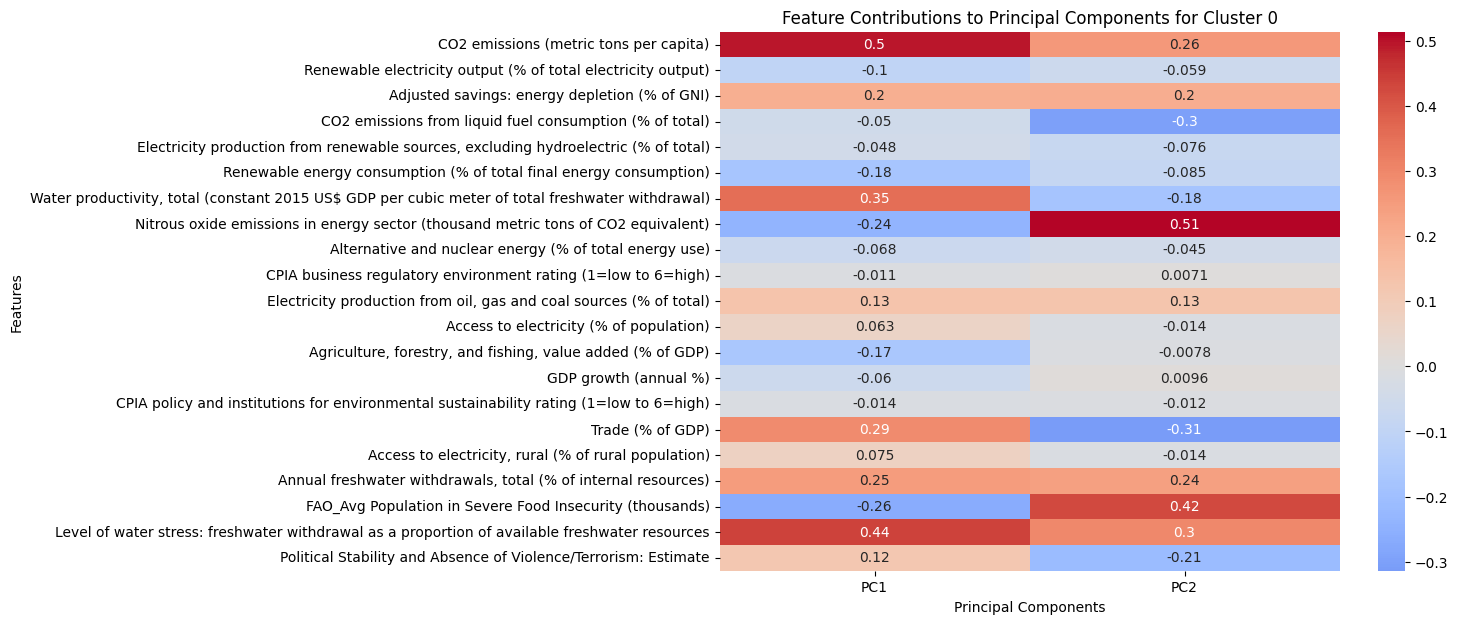

Top contributing features to Principal Component 1 for Cluster 0:
CO2 emissions (metric tons per capita)                                                              0.495903
Level of water stress: freshwater withdrawal as a proportion of available freshwater resources      0.436089
Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)    0.352962
Trade (% of GDP)                                                                                    0.289343
Annual freshwater withdrawals, total (% of internal resources)                                      0.250628
Name: PC1, dtype: float64
Top contributing features to Principal Component 2 for Cluster 0:
Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)                 0.513563
FAO_Avg Population in Severe Food Insecurity (thousands)                                          0.423262
Level of water stress: freshwater withdrawal as a proportion of available freshwate

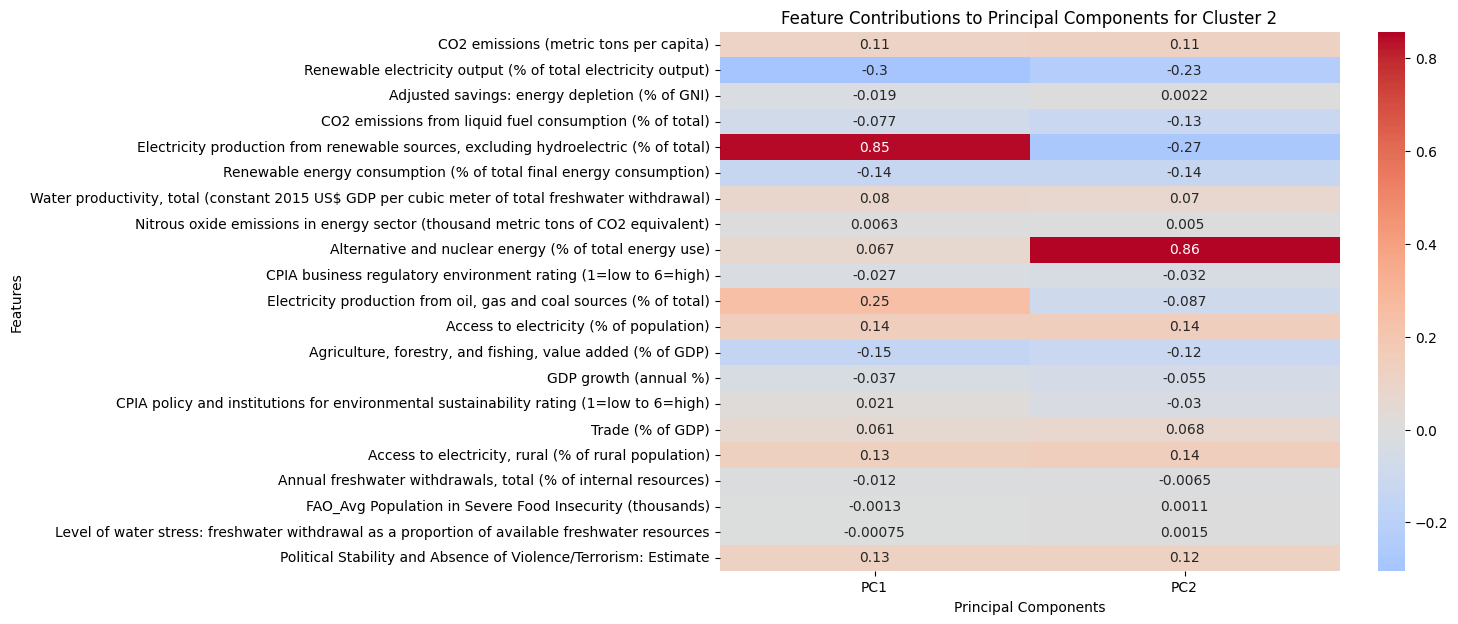

Top contributing features to Principal Component 1 for Cluster 2:
Electricity production from renewable sources, excluding hydroelectric (% of total)    0.845413
Electricity production from oil, gas and coal sources (% of total)                     0.247237
Access to electricity (% of population)                                                0.141140
Access to electricity, rural (% of rural population)                                   0.134495
Political Stability and Absence of Violence/Terrorism: Estimate                        0.126321
Name: PC1, dtype: float64
Top contributing features to Principal Component 2 for Cluster 2:
Alternative and nuclear energy (% of total energy use)             0.857050
Access to electricity, rural (% of rural population)               0.144549
Access to electricity (% of population)                            0.142211
Political Stability and Absence of Violence/Terrorism: Estimate    0.116363
CO2 emissions (metric tons per capita)                    

In [2]:
# feature engineering
import pandas as pd
import numpy as np
import spacy
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Load spaCy model for NLP operations
nlp = spacy.load('en_core_web_lg')

# Function to categorize features with NLP
def categorize_with_nlp(features, nlp_model):
    # keyword list
    environment_keywords = " ".join([
        "water stress", "renewable energy", "CO2 emissions", "energy depletion", "energy consumption",
        "electricity production", "fossil fuels", "resource depletion", "forest depletion", "land use",
        "emissions", "air quality", "pollution", "climate change", "biodiversity", "natural resources",
        "agriculture", "fishing", "forestry", "water withdrawal", "water productivity", "nitrous oxide emissions",
        "alternative energy", "nuclear energy", "freshwater withdrawals"
    ])
    social_keywords = " ".join([
        "food insecurity", "access to electricity", "GDP growth", "trade", "economic development",
        "health outcomes", "employment", "education expenditure", "hospital resources", "income distribution",
        "internet usage", "labor force participation", "life expectancy", "literacy rates", "child mortality",
        "migration", "drinking water access", "sanitation services", "population demographics", "poverty rates",
        "nutrition", "gender parity", "unemployment", "contraception need", "social inequality", "social welfare",
        "public services"
    ])
    governance_keywords = " ".join([
        "political stability", "violence and terrorism", "regulatory environment", "business regulation",
        "governance effectiveness", "rule of law", "accountability", "anti-corruption", "policy sustainability",
        "institutional quality", "legal rights", "civic freedoms", "government integrity", "transparency",
        "public sector performance"
    ])

    # Convert keyword strings to spaCy docs
    environment_text = nlp_model(environment_keywords)
    social_text = nlp_model(social_keywords)
    governance_text = nlp_model(governance_keywords)
    
    esg_categories = {'Environment': [], 'Social': [], 'Governance': []}
    for feature in features:
        feature_doc = nlp_model(feature)
        similarities = {
            'Environment': feature_doc.similarity(environment_text),
            'Social': feature_doc.similarity(social_text),
            'Governance': feature_doc.similarity(governance_text)
        }
        assigned_category = max(similarities, key=similarities.get)
        esg_categories[assigned_category].append(feature)
    return esg_categories


# Load and preprocess the dataset
esg_clustered_df = pd.read_csv('Output/final_dataset.csv')

# Identify and categorize the features using NLP
all_features = esg_clustered_df.drop(columns=['Area', 'Time period']).columns
categorized_features = categorize_with_nlp(all_features, nlp)

# Combine all categorized features
selected_features = sum(categorized_features.values(), [])

# Ensure the selected features exist in the dataset
features = esg_clustered_df[selected_features]
features = features.apply(pd.to_numeric, errors='coerce')
# Fill missing values and standardize the features
features_filled = features.fillna(features.mean())
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_filled)

# Apply Agglomerative Clustering and determine the clusters
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
esg_clustered_df['Cluster'] = cluster.fit_predict(features_scaled)

# Optionally map clusters to a synthetic score
cluster_to_score = {0: 'Low', 1: 'Medium', 2: 'High'}
esg_clustered_df['ESG_Score'] = esg_clustered_df['Cluster'].map(cluster_to_score)

# Dimensionality Reduction using PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(data=features_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = esg_clustered_df['Cluster']

# Plotting the PCA-transformed cluster data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('PCA of Clustered ESG Data')
plt.show()

# Display the countries and their corresponding clusters
clustered_countries = esg_clustered_df[['Area', 'Cluster']].drop_duplicates()
print("Countries and their Cluster Assignments:")
print(clustered_countries)

# Perform hierarchical clustering and plot the dendrogram
linked = linkage(features_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

clusters = esg_clustered_df['Cluster'].unique()
cluster_pca_results = {}

for cluster in clusters:
    cluster_data = features_scaled[esg_clustered_df['Cluster'] == cluster]
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(cluster_data)
    cluster_pca_results[cluster] = pca.components_.T  # Transpose to align features with components

    # Visualize the loadings for this cluster
    loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=selected_features)
    plt.figure(figsize=(10, 7))
    sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Feature Contributions to Principal Components for Cluster {cluster}')
    plt.xlabel('Principal Components')
    plt.ylabel('Features')
    plt.show()

    # Print top contributing features for each component in this cluster
    top_features_pc1 = loadings_df.nlargest(5, 'PC1')['PC1']
    top_features_pc2 = loadings_df.nlargest(5, 'PC2')['PC2']
    print(f"Top contributing features to Principal Component 1 for Cluster {cluster}:")
    print(top_features_pc1)
    print(f"Top contributing features to Principal Component 2 for Cluster {cluster}:")
    print(top_features_pc2)

# Define numeric columns - this depends on your specific dataset
numeric_cols = esg_clustered_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate Z-scores for the entire dataset or within each cluster
esg_clustered_df[numeric_cols] = esg_clustered_df[numeric_cols].apply(zscore)

# Display the DataFrame to check Z-scores
print(esg_clustered_df.head())

# Display the area along with the predicted ESG scores
print(esg_clustered_df[['Area', 'ESG_Score']])


In [3]:
# selecting attributes for final dataset
import pandas as pd
import pycountry

# Function to check if a name is a recognized country
def is_country(name):
    try:
        # Attempt to look up the country in pycountry
        if pycountry.countries.lookup(name):
            return True
    except LookupError:
        # If lookup fails, the name is not a recognized country
        return False



# Load the initial dataset
file_path = 'Output/final_combined_dataset_2023.csv'
initial_dataset = pd.read_csv(file_path)

# Preprocessing
# Replace zeros with NaN so they are considered as missing values
preprocessed_data = initial_dataset.replace(0, pd.NA)

# Calculate the threshold for 50% of the data
threshold = len(preprocessed_data.columns) / 2

# Remove rows that have more than 50% missing values
preprocessed_data = preprocessed_data.dropna(thresh=threshold)

# Keep track of the removed areas
removed_rows = initial_dataset[~initial_dataset.index.isin(preprocessed_data.index)]
removed_areas = removed_rows['Area'].unique()

# Save the preprocessed data to a new file
preprocessed_file_path = 'Output/final_dataset.csv'
preprocessed_data.to_csv(preprocessed_file_path, index=False)

# Load the preprocessed dataset for final filtering
finalized_data = pd.read_csv(preprocessed_file_path)

# Define the final list of attributes
final_attributes = [
    "Area",
    "Time period",
    "FAO_Avg Population in Severe Food Insecurity (thousands)",  
    "Level of water stress: freshwater withdrawal as a proportion of available freshwater resources", 
    "Access to electricity (% of population)",
    "CO2 emissions (metric tons per capita)",  
    "Agriculture, forestry, and fishing, value added (% of GDP)",
    "Renewable electricity output (% of total electricity output)",
    "Political Stability and Absence of Violence/Terrorism: Estimate",  
    "Adjusted savings: energy depletion (% of GNI)",  
    "CO2 emissions from liquid fuel consumption (% of total)",
    "Electricity production from renewable sources, excluding hydroelectric (% of total)",
    "GDP growth (annual %)",  
    "Renewable energy consumption (% of total final energy consumption)",
    "Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",
    "CPIA policy and institutions for environmental sustainability rating (1=low to 6=high)",
    "Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)",
    "Trade (% of GDP)", 
    "Access to electricity, rural (% of rural population)",
    "Alternative and nuclear energy (% of total energy use)",
    "CPIA business regulatory environment rating (1=low to 6=high)",
    "Electricity production from oil, gas and coal sources (% of total)", 
    "Annual freshwater withdrawals, total (% of internal resources)"  

]

# Filter the dataset to include only the selected attributes
finalized_data = finalized_data[final_attributes].drop_duplicates()

# Rename the attribute as specified
finalized_data.rename(columns={"Total greenhouse gas emissions (kt of CO2 equivalent)": "Total greenhouse gas emissions (kt)"}, inplace=True)

# Calculate and print the missing data percentages for all attributes
missing_data_percentages = finalized_data.isnull().mean() * 100
print("Missing data percentages for each attribute:")
print(missing_data_percentages)

# Apply the check across the 'Area' attribute
finalized_data['Is_Country'] = finalized_data['Area'].apply(is_country)

# Filter out names that are not recognized as countries
non_countries = finalized_data[~finalized_data['Is_Country']]

# Drop the helper column if no longer needed
finalized_data.drop('Is_Country', axis=1, inplace=True)
# Save the filtered dataset back to the file
finalized_data.to_csv('Output/final_dataset.csv', index=False)


Missing data percentages for each attribute:
Area                                                                                                 0.000000
Time period                                                                                          0.000000
FAO_Avg Population in Severe Food Insecurity (thousands)                                            32.428115
Level of water stress: freshwater withdrawal as a proportion of available freshwater resources       0.000000
Access to electricity (% of population)                                                              0.000000
CO2 emissions (metric tons per capita)                                                               0.000000
Agriculture, forestry, and fishing, value added (% of GDP)                                           0.000000
Renewable electricity output (% of total electricity output)                                         0.000000
Political Stability and Absence of Violence/Terrorism: Estimate            

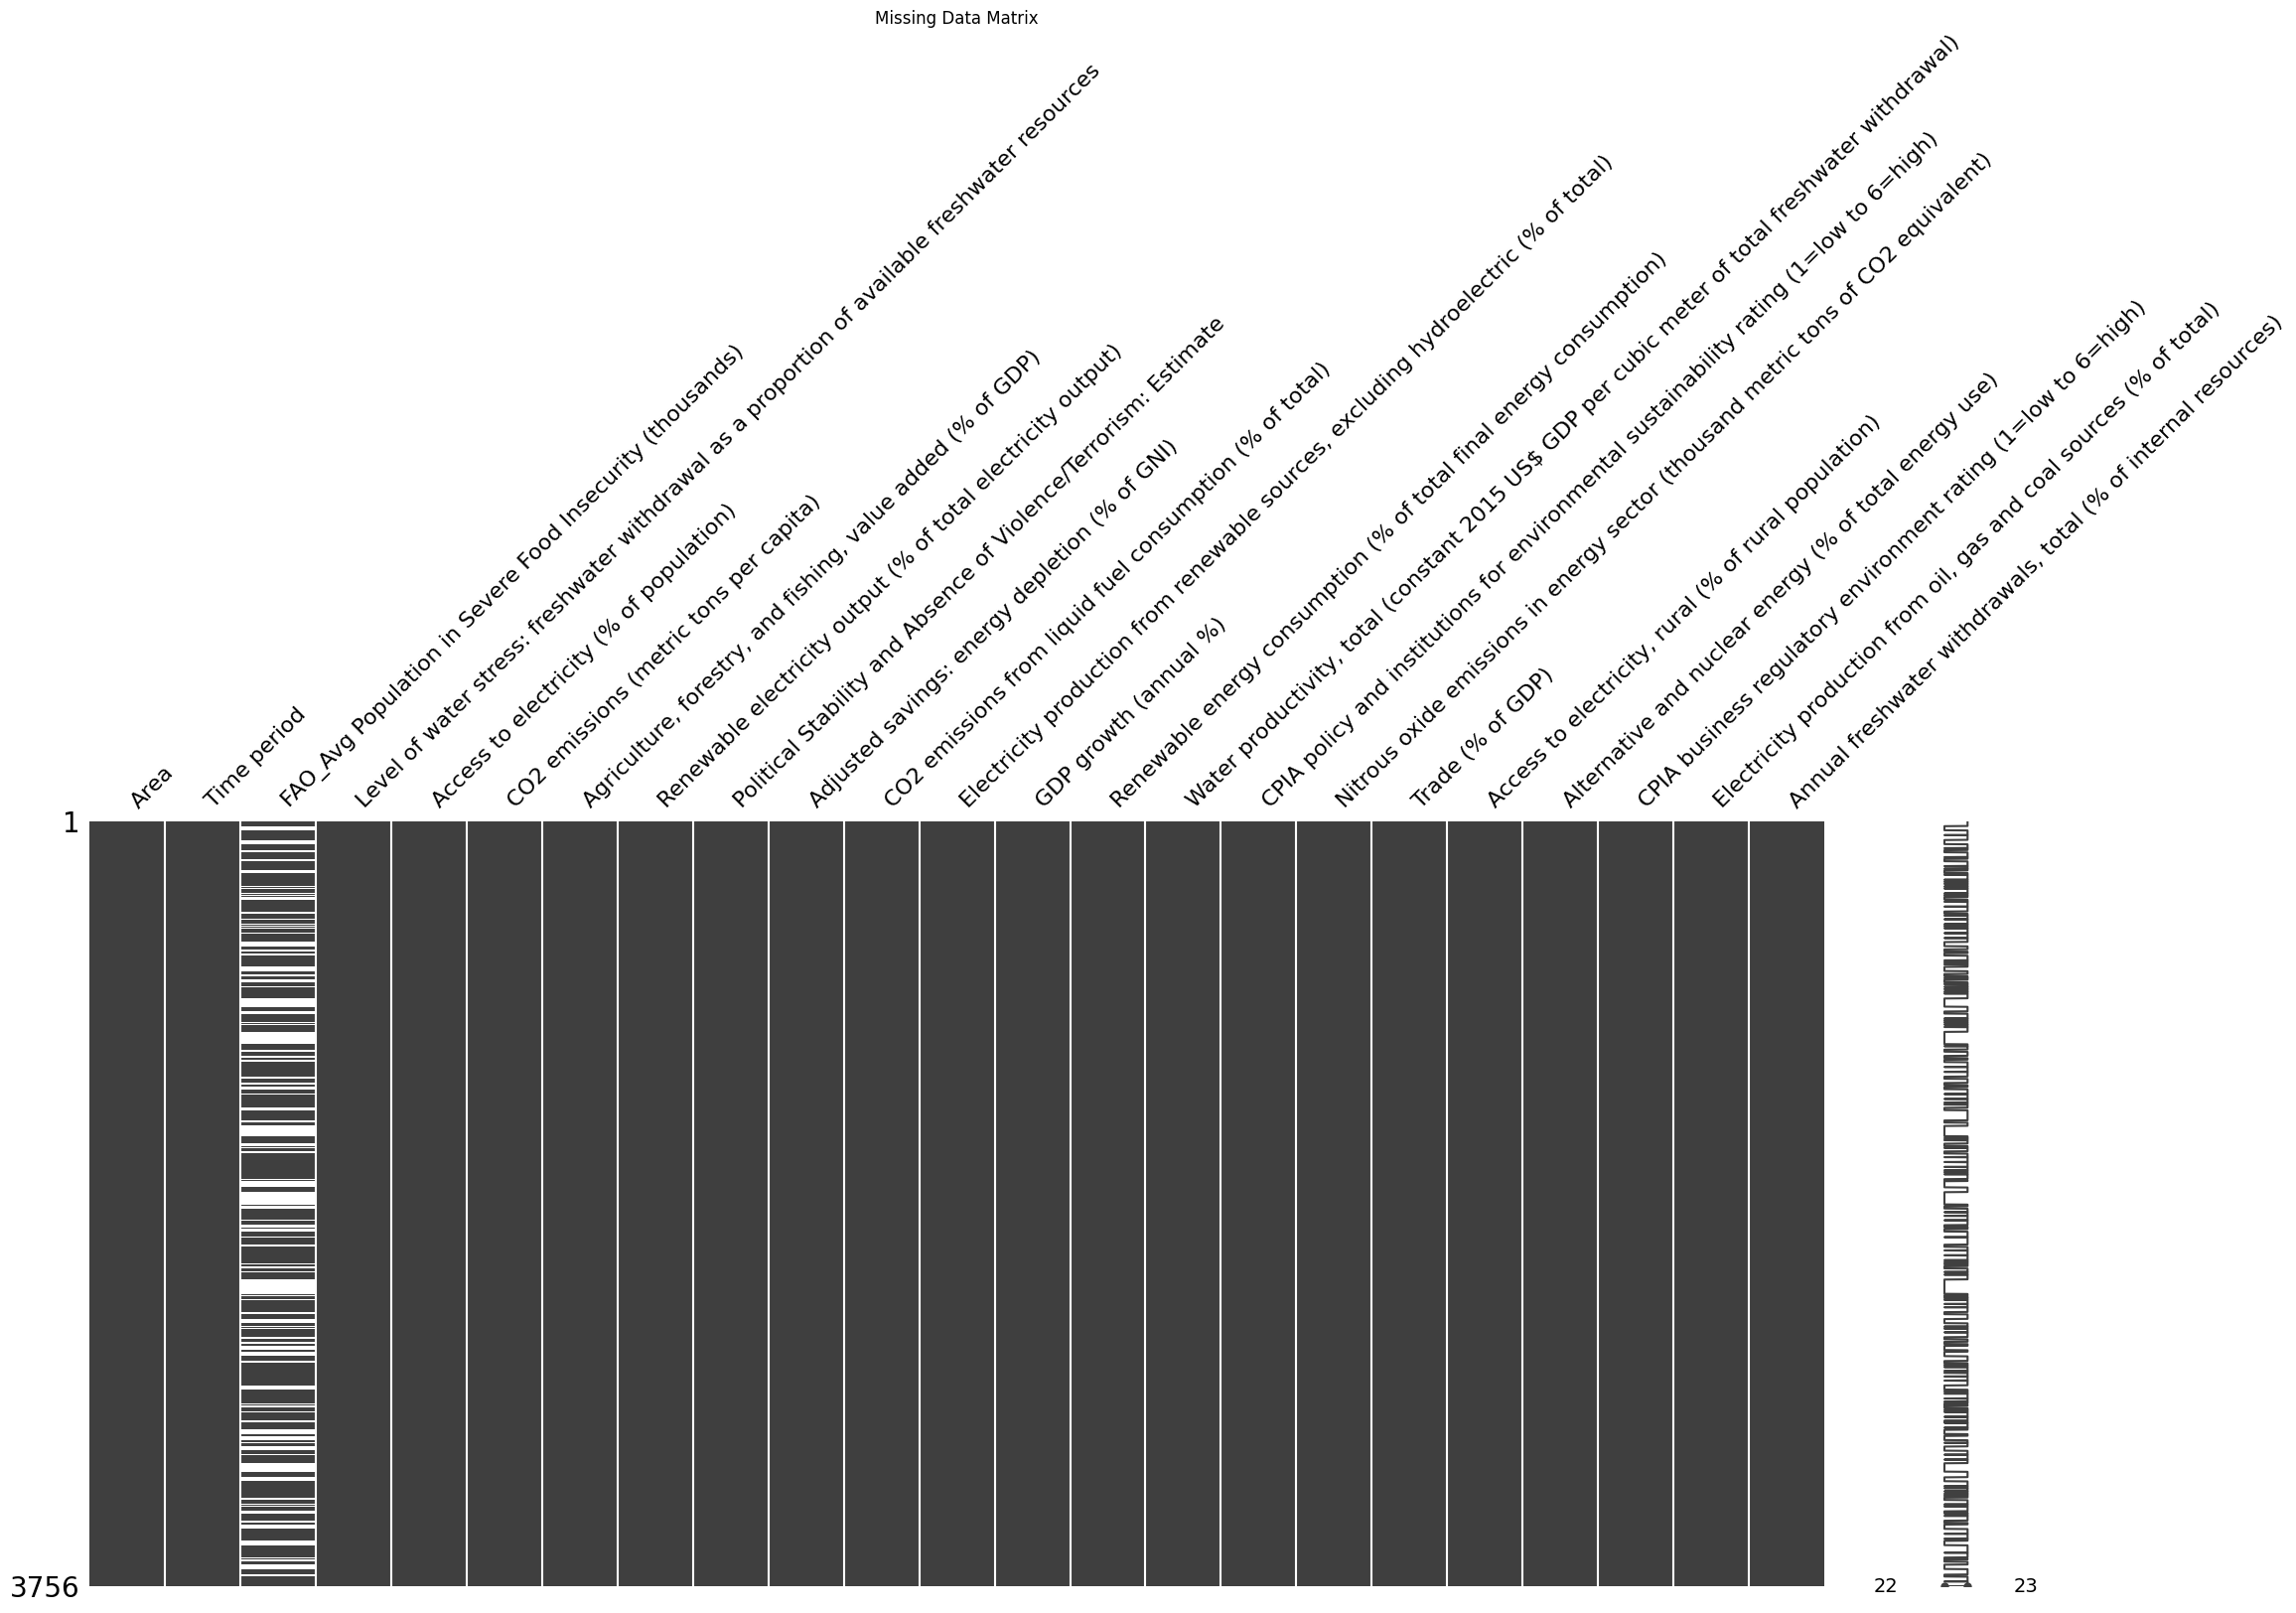

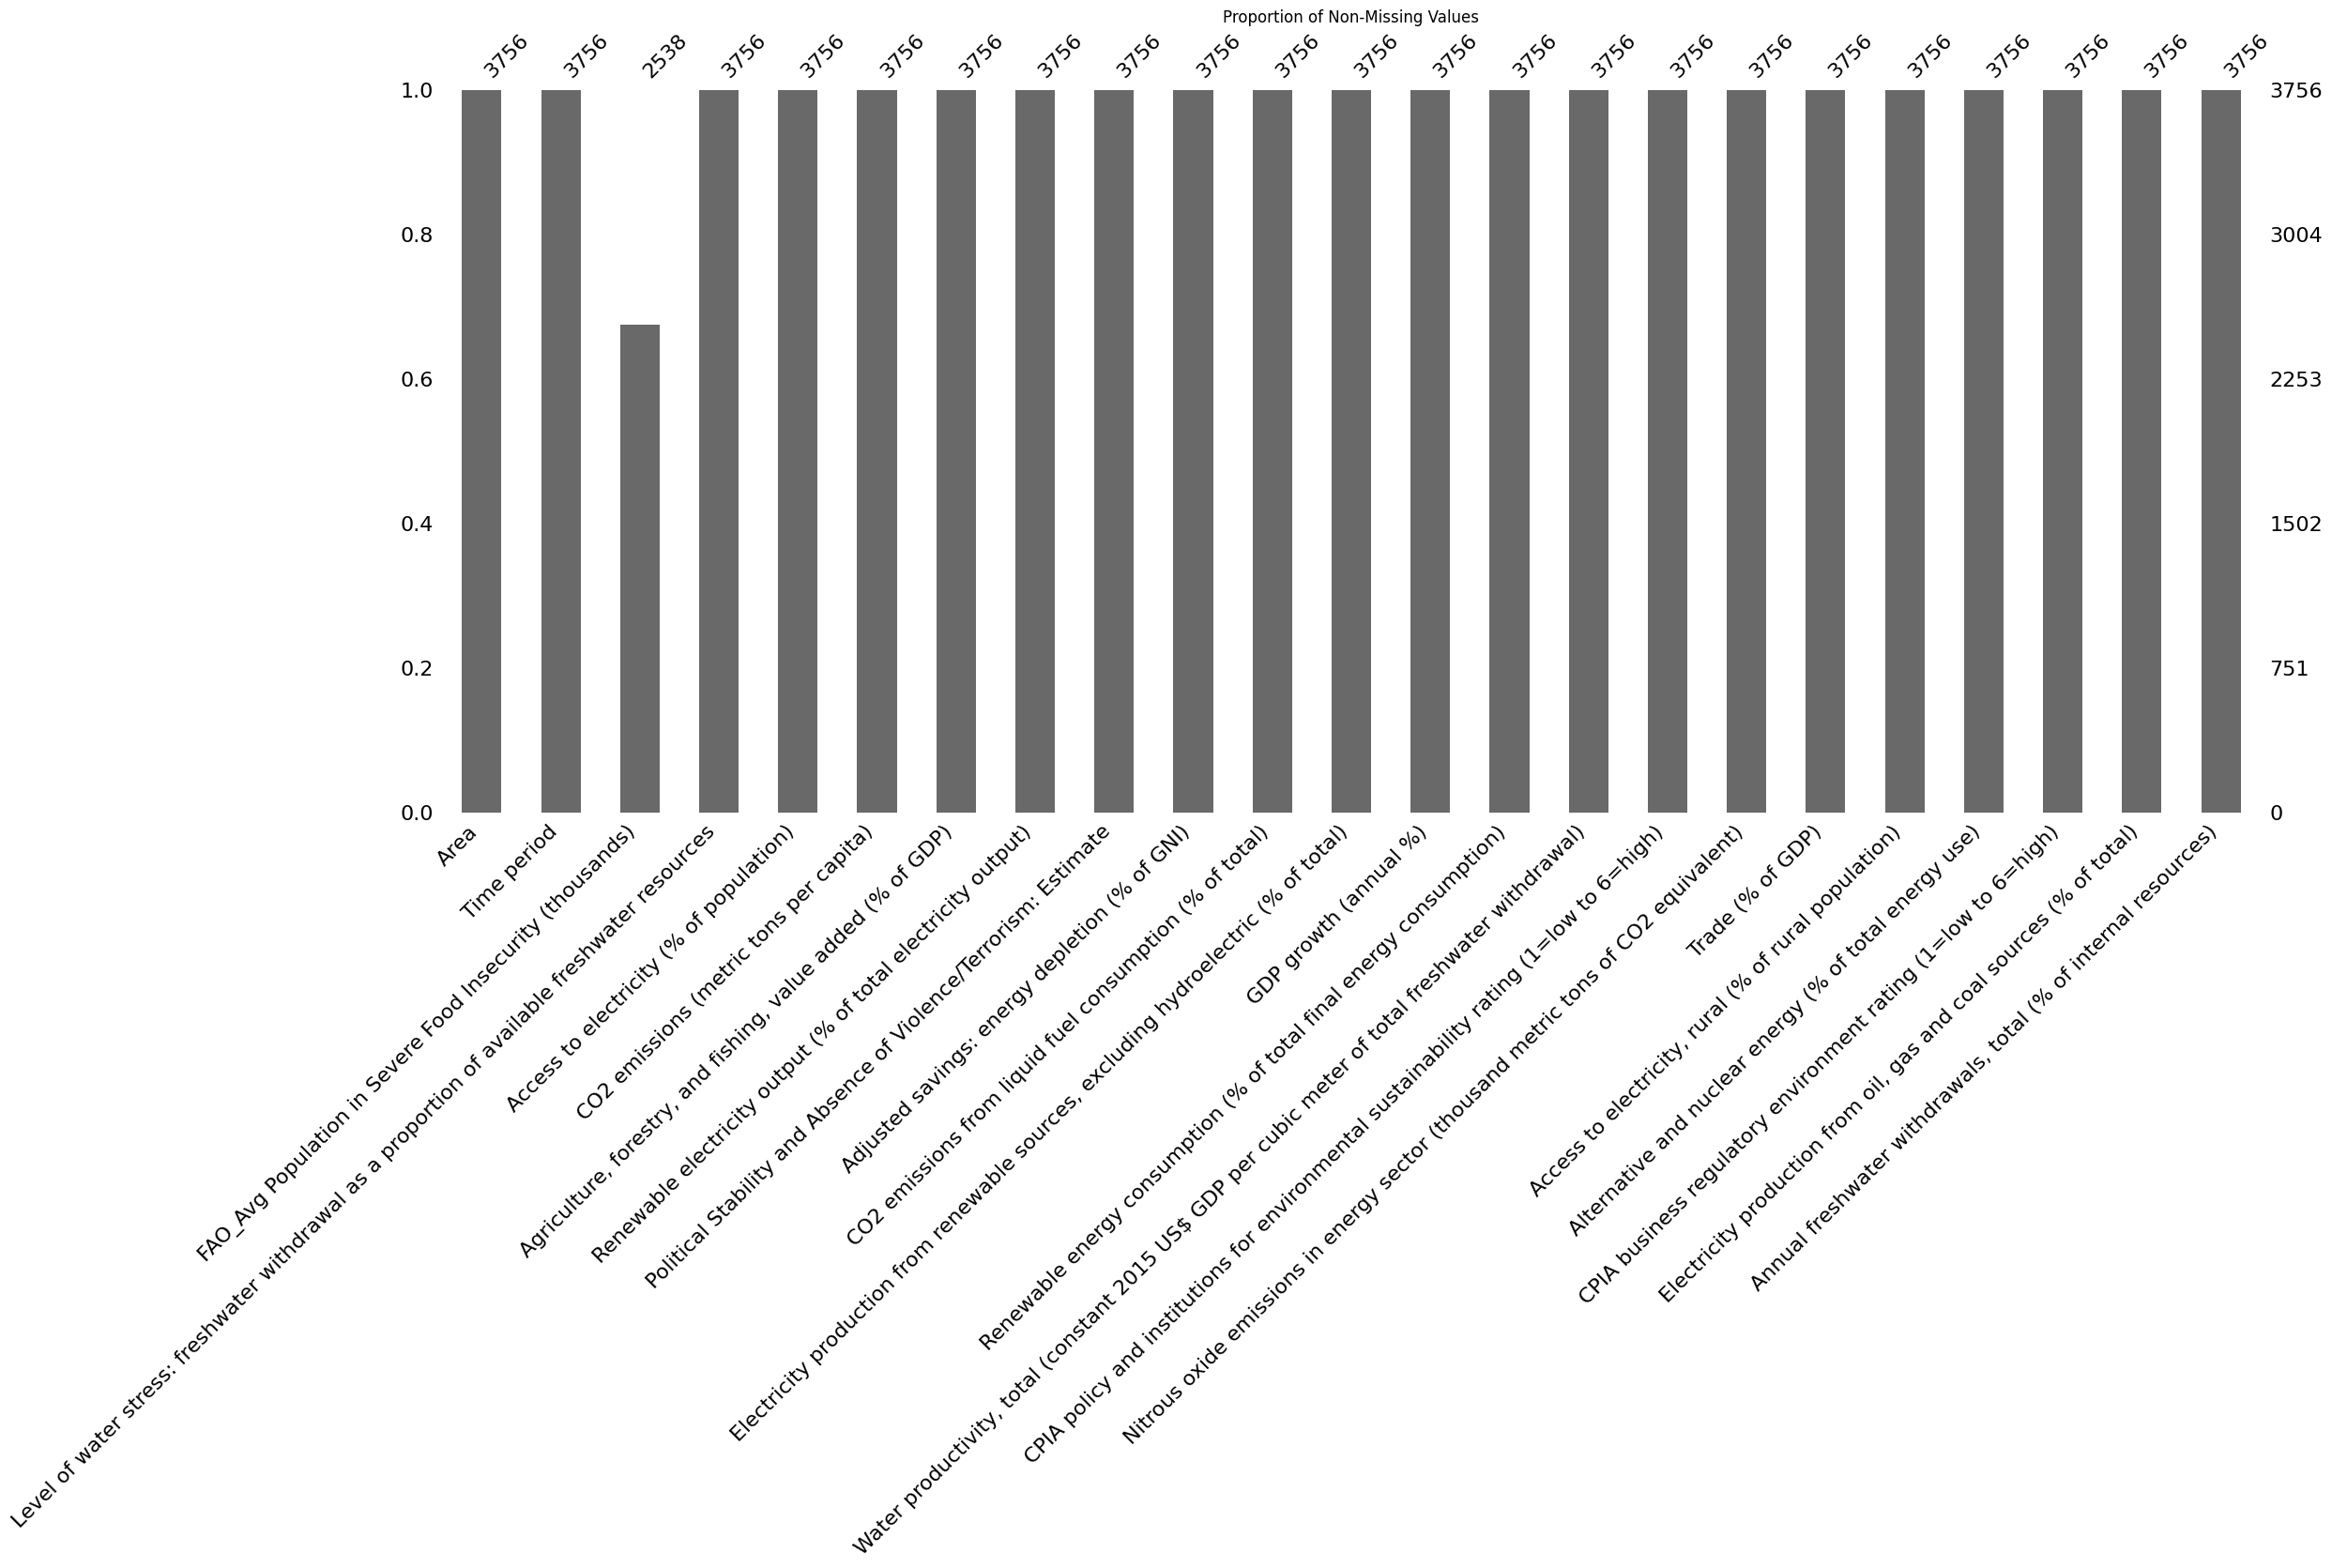

Chi-squared: 23.00, P-value: 0.4017
Indication of MCAR if P-value > 0.05: Yes


In [4]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

# Load your data
data_path = 'Output/final_dataset.csv'  # Change this to the path of your CSV file
data = pd.read_csv(data_path)

# Visual inspection of missing data
msno.matrix(data)
plt.title('Missing Data Matrix')
plt.show()

msno.bar(data)
plt.title('Proportion of Non-Missing Values')
plt.show()


# Little's MCAR Test - Simplified Approach
def simple_mcar_test(df):
    observed = df.isnull()
    chi2_val, p_val, _, _ = chi2_contingency(pd.crosstab(observed.columns, observed.sum(axis=0)))
    return chi2_val, p_val

chi2, p_value = simple_mcar_test(data)
print(f"Chi-squared: {chi2:.2f}, P-value: {p_value:.4f}")
print("Indication of MCAR if P-value > 0.05:", "Yes" if p_value > 0.05 else "No")


In [5]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
final_data = pd.read_csv('Output/final_dataset.csv')

# Replace '<100' with NaN for a more appropriate ML-based imputation
final_data.replace('<100', np.nan, inplace=True)

# Drop rows where 'Area' or 'Time period' are missing
final_data.dropna(subset=['Area', 'Time period'], inplace=True)

# Convert all columns to numeric, excluding 'Area' and 'Time period'
numeric_cols = final_data.columns.difference(['Area', 'Time period'])
final_data[numeric_cols] = final_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Save original data for later comparison
original_data = final_data.copy()

# Impute missing values using Iterative Imputer with RandomForest
iter_imputer = IterativeImputer(RandomForestRegressor(n_estimators=100, random_state=42), random_state=42)
final_data[numeric_cols] = iter_imputer.fit_transform(final_data[numeric_cols])

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(final_data[numeric_cols])
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_cols, index=final_data.index)

# Define the Autoencoder model
input_dim = data_scaled.shape[1]
model = Sequential([
    InputLayer(input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid')  # Sigmoid ensures all output values are between 0 and 1
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Split the data into training and validation sets
X_train, X_valid = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Train the model with EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, 
          validation_data=(X_valid, X_valid), callbacks=[early_stopping])

# Predict (impute) on the scaled dataset
imputed_scaled_data = model.predict(data_scaled)

# Rescale the imputed data back to original scale
imputed_data_rescaled = scaler.inverse_transform(imputed_scaled_data)
imputed_data_rescaled_df = pd.DataFrame(imputed_data_rescaled, columns=numeric_cols, index=final_data.index)

# Replace only the missing values in the original dataset
for col in numeric_cols:
    final_data[col] = np.where(original_data[col].isna(), imputed_data_rescaled_df[col], original_data[col])

# Cap values at a reasonable maximum based on the 95th percentile
for col in numeric_cols:
    reasonable_max = np.percentile(original_data[col].dropna(), 95)
    final_data[col] = np.where(final_data[col] > reasonable_max, reasonable_max, final_data[col])

# Ensure non-zero minimum value for all entries
for col in numeric_cols:
    min_val = original_data[col][original_data[col] > 0].min()
    final_data[col] = np.where(final_data[col] <= 0, min_val, final_data[col])

# Remove duplicates based on 'Area' and 'Time period'
final_data = final_data.drop_duplicates(subset=['Area', 'Time period'])

# Save the imputed dataset
final_imputed_dataset_path = 'Output/final_imputed_dataset.csv'
final_data.to_csv(final_imputed_dataset_path, index=False)

print(f"Imputed dataset saved to {final_imputed_dataset_path}")

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1324 - val_loss: 0.1166
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1062 - val_loss: 0.0667
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0564 - val_loss: 0.0347
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0323 - val_loss: 0.0278
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0274 - val_loss: 0.0260
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0265 - val_loss: 0.0244
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0241 - val_loss: 0.0223
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0215 - val_loss: 0.0198
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189 - val_loss: 0.0176
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0172 - val_loss: 0.0162
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0156 - val_loss: 0.0153
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

In [6]:
import pandas as pd
import spacy
from sklearn.preprocessing import MinMaxScaler

# Load spaCy model for NLP operations
nlp = spacy.load('en_core_web_lg')

def categorize_with_nlp(features, nlp_model):
    # Keyword lists
    environment_keywords = " ".join(["water stress", "renewable energy", "CO2 emissions", "energy depletion", "energy consumption",
                                     "electricity production", "fossil fuels", "resource depletion", "forest depletion", "land use",
                                     "emissions", "air quality", "pollution", "climate change", "biodiversity", "natural resources",
                                     "agriculture", "fishing", "forestry", "water withdrawal", "water productivity", "nitrous oxide emissions",
                                     "alternative energy", "nuclear energy", "freshwater withdrawals"])
    social_keywords = " ".join(["food insecurity", "access to electricity", "GDP growth", "trade", "economic development",
                                "health outcomes", "employment", "education expenditure", "hospital resources", "income distribution",
                                "internet usage", "labor force participation", "life expectancy", "literacy rates", "child mortality",
                                "migration", "drinking water access", "sanitation services", "population demographics", "poverty rates",
                                "nutrition", "gender parity", "unemployment", "contraception need", "social inequality", "social welfare",
                                "public services"])
    governance_keywords = " ".join(["political stability", "violence and terrorism", "regulatory environment", "business regulation",
                                    "governance effectiveness", "rule of law", "accountability", "anti-corruption", "policy sustainability",
                                    "institutional quality", "legal rights", "civic freedoms", "government integrity", "transparency",
                                    "public sector performance"])

    # Convert keyword strings to spaCy docs
    environment_text = nlp_model(environment_keywords)
    social_text = nlp_model(social_keywords)
    governance_text = nlp_model(governance_keywords)
    
    esg_categories = {'Environment': [], 'Social': [], 'Governance': []}
    for feature in features:
        feature_doc = nlp_model(feature)
        similarities = {
            'Environment': feature_doc.similarity(environment_text),
            'Social': feature_doc.similarity(social_text),
            'Governance': feature_doc.similarity(governance_text)
        }
        assigned_category = max(similarities, key=similarities.get)
        esg_categories[assigned_category].append(feature)
    return esg_categories

def calculate_esg_scores(df, esg_categories, weights):
    scaler = MinMaxScaler(feature_range=(0, 100))
    df_esg_scores = pd.DataFrame(index=df.index)
    
    for category, features in esg_categories.items():
        valid_features = [f for f in features if f in df.columns]
        df_category = df[valid_features].apply(pd.to_numeric, errors='coerce').fillna(0)
        if not df_category.empty:
            df_category_scaled = scaler.fit_transform(df_category)
            df_esg_scores[category] = df_category_scaled.mean(axis=1) * weights[category]
    
    df_esg_scores['ESG_Score'] = df_esg_scores.sum(axis=1)
    return df_esg_scores['ESG_Score']

# Load and preprocess the final imputed dataset
final_dataset = pd.read_csv('Output/final_imputed_dataset.csv')

# Categorize features with NLP and calculate ESG scores
final_features = final_dataset.columns.difference(['Area', 'Time period'])
final_categories = categorize_with_nlp(final_features, nlp)
weights = {'Environment': 0.45, 'Social': 0.30, 'Governance': 0.25}
final_dataset['ESG_Score'] = calculate_esg_scores(final_dataset, final_categories, weights)

# Print the list of attributes considered for each category
print("Attributes considered for each category:")
for category, attributes in final_categories.items():
    print(f"{category}: {len(attributes)} attributes")
    print(', '.join(attributes))

final_esg_df = pd.merge(final_dataset[['Area','Time period','ESG_Score']],final_data, on=['Area', 'Time period'], how='outer')
final_esg_df.drop_duplicates(subset=['Area', 'Time period'], keep='first').to_csv('Output/final_imputed_dataset.csv', index=False)

Attributes considered for each category:
Environment: 11 attributes
Adjusted savings: energy depletion (% of GNI), Alternative and nuclear energy (% of total energy use), CO2 emissions (metric tons per capita), CO2 emissions from liquid fuel consumption (% of total), CPIA business regulatory environment rating (1=low to 6=high), Electricity production from oil, gas and coal sources (% of total), Electricity production from renewable sources, excluding hydroelectric (% of total), Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent), Renewable electricity output (% of total electricity output), Renewable energy consumption (% of total final energy consumption), Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)
Social: 7 attributes
Access to electricity (% of population), Access to electricity, rural (% of rural population), Agriculture, forestry, and fishing, value added (% of GDP), Annual freshwater withdrawals,

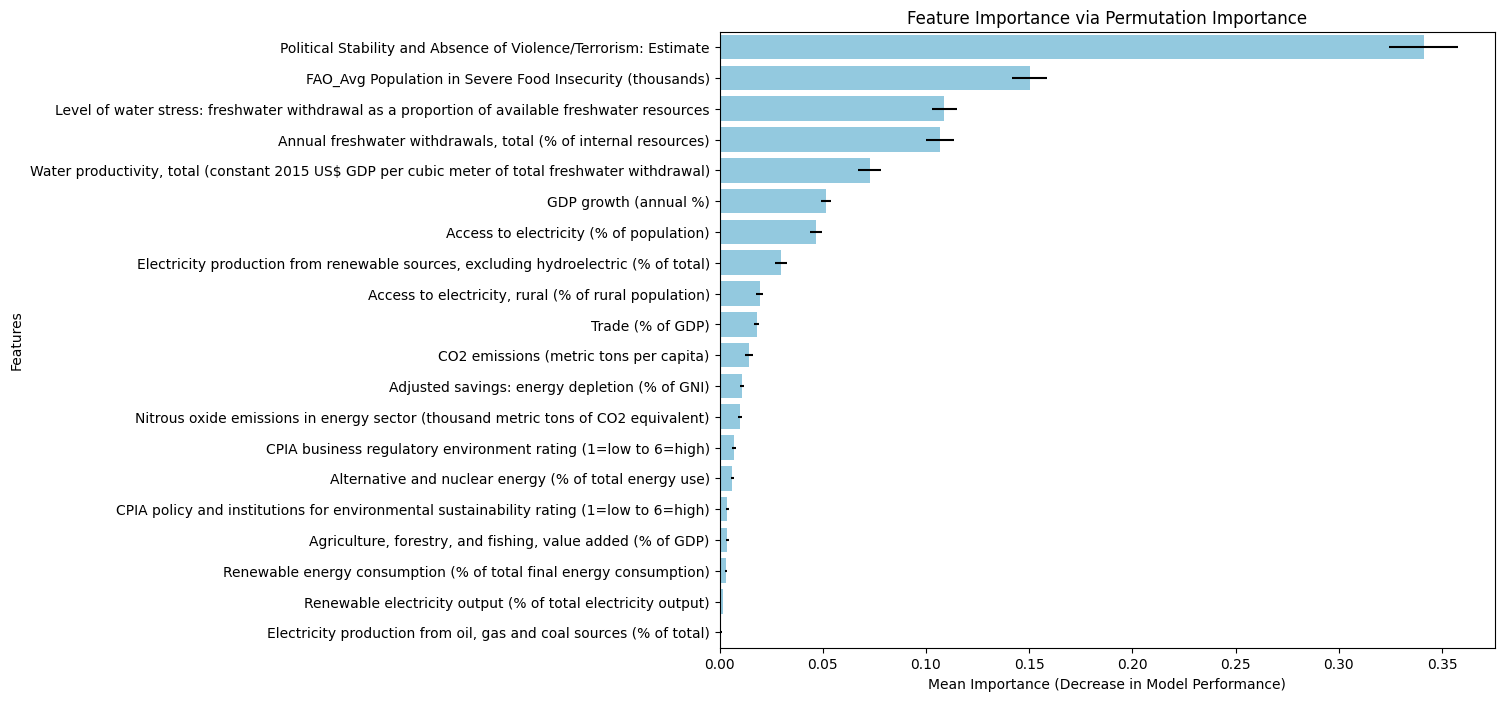

In [7]:
# Feature Analysis 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance

# Assuming X is your feature set and y is your target variable
X = final_esg_df.drop(['Area', 'Time period', 'ESG_Score'], axis=1)
y = final_esg_df['ESG_Score']

# Split the dataset into the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Perform permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Extract feature importance and their standard deviations
importance_df = pd.DataFrame(np.vstack((X.columns, 
                                        perm_importance.importances_mean, 
                                        perm_importance.importances_std)).T, 
                             columns=['Feature', 'Importance', 'Std'])
importance_df['Importance'] = importance_df['Importance'].astype(float)
# Ensure the DataFrame is correctly sorted by importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Reset the index to match the sorted features
importance_df.reset_index(drop=True, inplace=True)

# Visualizing Feature Importances with error bars
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), 
            xerr=importance_df.head(20)['Std'], color='skyblue')
plt.title('Feature Importance via Permutation Importance')
plt.xlabel('Mean Importance (Decrease in Model Performance)')
plt.ylabel('Features')
plt.show()




In [8]:
import pandas as pd
from fuzzywuzzy import process

# Load datasets
sentiment1_df = pd.read_csv('Uncleaned\Sentiment1.csv')
sentiment2_df = pd.read_csv('Uncleaned\Sentiment2.csv')

# Standardize and rename columns
sentiment2_df.columns = sentiment2_df.columns.str.strip().str.lower()
sentiment1_df.rename(columns={
    'Area': 'country',
    'Time Period': 'year',
    'Environment': 'environment',
    'Social': 'social',
    'Governance': 'governance',
    'Average Sentiment': 'average_sentiment'
}, inplace=True)

# Correct country names based on a combined list from both datasets
unique_countries_sentiment1 = sentiment1_df['country'].unique()
unique_countries_sentiment2 = sentiment2_df['country'].unique()
all_unique_countries = set(unique_countries_sentiment1).union(set(unique_countries_sentiment2))

def correct_country_names(df, reference_list):
    corrected_names = []
    for country in df['country']:
        corrected_name, _ = process.extractOne(country.strip(), reference_list)
        corrected_names.append(corrected_name)
    df['country'] = corrected_names

correct_country_names(sentiment1_df, list(all_unique_countries))
correct_country_names(sentiment2_df, list(all_unique_countries))

# Merge datasets
merged_df = pd.merge(sentiment1_df, sentiment2_df, on=['country', 'year'], how='outer',
                     suffixes=('_sentiment1', '_sentiment2'))

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Identify columns with the least missing values
sentiment_columns = ['environment_sentiment1', 'social_sentiment1', 'governance_sentiment1',
                     'environment_sentiment2', 'governance_sentiment2', 'other', 'social_sentiment2',
                     'total_sentiment_score']
# We filled missing values, so we consider all columns directly
columns_to_keep = sentiment_columns  # Keeping all because we filled missing values with 0

# Calculate the final sentiment based on selected attributes
merged_df['final_sentiment_score'] = merged_df[columns_to_keep].mean(axis=1)

# Displaying the final DataFrame structure and the calculated final sentiment score for verification
columns_to_display = ['country', 'year', 'final_sentiment_score'] + columns_to_keep
print(merged_df[columns_to_display].head())
# Keeping only relevant columns
senti_df = merged_df[['country', 'year', 'final_sentiment_score']]

# Display the transformed DataFrame
print(senti_df.head())

         country  year  final_sentiment_score  environment_sentiment1  \
0   Australia     2010                  0.250                     0.0   
1   Australia     2012                  0.000                     0.0   
2   Australia     2015                 -0.125                     0.0   
3   Australia     2015                 -0.250                     0.0   
4   Australia     2015                  0.000                     0.0   

   social_sentiment1  governance_sentiment1  environment_sentiment2  \
0                0.0                    0.0                     0.0   
1                0.0                    0.0                     0.0   
2                0.0                    0.0                     0.0   
3                0.0                    0.0                     0.0   
4                0.0                    0.0                     0.0   

   governance_sentiment2  other  social_sentiment2  total_sentiment_score  
0                    1.0    0.0                0.0        

In [9]:
senti_df.to_csv('cleaned/final_sentiment.csv', index=False)

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pycountry
from fuzzywuzzy import process

def normalize_sentiment_scores(df, column_name):
    """ Normalize scores to a more granular range and adjust the distribution. """
    scaler = MinMaxScaler(feature_range=(-1, 1))  # Adjusting range to -1 to 1 for better distribution
    df[column_name] = scaler.fit_transform(df[[column_name]])
    # Adding some noise to avoid identical scores
    np.random.seed(42)
    df[column_name] += np.random.normal(0, 0.1, df[column_name].shape)  # Small noise
    return df

def is_valid_country(name):
    """ Check if the name is a valid country. """
    # Normalize the input name to ensure a case-insensitive comparison
    name = name.lower().strip()
    # Create a set of all valid country names
    valid_countries = {country.name.lower() for country in pycountry.countries}
    return name in valid_countries

def get_validated_country(name, valid_countries):
    """ Validate and return the closest valid country name using fuzzy matching. """
    closest_name, score = process.extractOne(name.lower(), valid_countries, scorer=process.fuzz.partial_ratio)
    return closest_name if score > 80 else None  # Using a high threshold to avoid incorrect matches

# Generate a set of valid country names only once to optimize performance
valid_countries = {country.name.lower() for country in pycountry.countries}

# Load and preprocess the datasets
final_imputed_dataset_path = 'Output/final_imputed_dataset.csv'
final_sentiment_dataset_path = 'cleaned/final_sentiment.csv'
final_imputed_df = pd.read_csv(final_imputed_dataset_path)
final_sentiment_df = pd.read_csv(final_sentiment_dataset_path)
final_sentiment_df.columns = ['Area', 'Time period', 'final_sentiment_score']


# Validate and adjust 'Area' names in the datasets to ensure they are recognized countries
final_imputed_df['Area'] = final_imputed_df['Area'].apply(lambda x: get_validated_country(x, valid_countries) if x else x)
final_sentiment_df['Area'] = final_sentiment_df['Area'].apply(lambda x: get_validated_country(x, valid_countries) if x else x)

# Remove entries with unvalidated or incorrect country names
final_imputed_df = final_imputed_df[final_imputed_df['Area'].notnull()]
final_sentiment_df = final_sentiment_df[final_sentiment_df['Area'].notnull()]

# Normalize sentiment scores
combined_df = pd.merge(final_imputed_df, final_sentiment_df, on=['Area', 'Time period'], how='left')
combined_df = normalize_sentiment_scores(combined_df, 'final_sentiment_score')

# Impute missing data using KNN and RandomForest
def impute_data(df, numeric_cols):
    knn_imputer = KNNImputer(n_neighbors=5)
    df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])
    return df

numeric_cols = ['ESG_Score', 'final_sentiment_score']
combined_df = impute_data(combined_df, numeric_cols)

# Using an Autoencoder for imputation refinement
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df[numeric_cols])
model = Sequential([
    InputLayer(input_shape=(data_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(data_scaled.shape[1], activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)
model.fit(X_train, X_train, epochs=100, batch_size=32, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
imputed_data = model.predict(data_scaled)
combined_df[numeric_cols] = scaler.inverse_transform(imputed_data)

# Categorize sentiment scores
def categorize_sentiment(score):
    if score > 0.5:
        return "positive"
    elif score < -0.5:
        return "negative"
    else:
        return "neutral"

combined_df['Sentiment_Category'] = combined_df['final_sentiment_score'].apply(categorize_sentiment)

def calculate_rating(esg_score, sentiment_score, esg_weight=0.6, sentiment_weight=0.4):
    """Calculate a weighted average of ESG and sentiment scores."""
    # Check for NaN and assign 0 if NaN
    esg_score = 0 if np.isnan(esg_score) else esg_score
    sentiment_score = 0 if np.isnan(sentiment_score) else sentiment_score
    
    # Calculate weighted average
    rating = (esg_score * esg_weight) + (sentiment_score * sentiment_weight)
    return rating

# Normalize the ESG_Score and final_sentiment_score for rating calculation
scaler = MinMaxScaler(feature_range=(0, 100))
combined_df[['ESG_Score', 'final_sentiment_score']] = scaler.fit_transform(combined_df[['ESG_Score', 'final_sentiment_score']])

# Replace NaN with 0 in these columns before applying the function
combined_df[['ESG_Score', 'final_sentiment_score']] = combined_df[['ESG_Score', 'final_sentiment_score']].fillna(0)

# Remove duplicates based on 'Area' and 'Time period'
combined_df.drop_duplicates(subset=['Area', 'Time period'], inplace=True)

# Save the updated dataset
combined_df.to_csv('Output/final_dataset_with_sentiment.csv', index=False)


Epoch 1/100


C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - loss: 0.0690
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.0162
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.0041
Epoch 4/100
 1/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0029

C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.0017
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.0011
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 5.8186e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 1.4000e-04
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 1.0281e-04
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3554e-05
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 6.3054e-05
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 5.8460e-05
Epoch 12/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 6.3576e-05
Epoch 13/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 5.7352e-05
Epoch 14/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 4.1479e-05
Epoch 15/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4463e-05
Epoch 16/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7066e-05
Epoch 17/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2691e-05
Epoch 18/100

In [11]:
#chatbot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForQuestionAnswering, AutoModelForSequenceClassification
import torch
import numpy as np

# Load the final dataset
data_path = 'Output/final_dataset_with_sentiment.csv'
df = pd.read_csv(data_path)

# Specify the models for the pipelines
qa_model_name = "distilbert-base-uncased-distilled-squad"
intent_model_name = "j-hartmann/emotion-english-distilroberta-base"

# Initialize the question-answering pipeline
qa_pipeline = pipeline("question-answering", model=qa_model_name, tokenizer=qa_model_name)

# Load the tokenizer and model for intent classification
tokenizer = AutoTokenizer.from_pretrained(intent_model_name)
intent_model = AutoModelForSequenceClassification.from_pretrained(intent_model_name)

# Define a function for intent classification
def classify_intent(question):
    inputs = tokenizer(question, return_tensors="pt")
    outputs = intent_model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    confidence, predicted_class = torch.max(probabilities, dim=-1)
    intent = intent_model.config.id2label[predicted_class.item()]
    return intent, confidence.item()

# Define a function to extract relevant information
def get_relevant_info(intent, question):
    if "sentiment" in intent.lower():
        context = df[['Area', 'Time period', 'Sentiment_Category']].to_string(index=False)
    elif "esg" in intent.lower():
        context = df[['Area', 'Time period', 'ESG_Score']].to_string(index=False)
    elif "rating" in intent.lower():
        context = df[['Area', 'Time period', 'Rating']].to_string(index=False)
    else:
        context = df.to_string(index=False)
    return context

# Define a function to generate visualizations
def generate_visualization(intent):
    if "sentiment" in intent.lower():
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='Sentiment_Category')
        plt.title('Sentiment Distribution')
        plt.show()
    elif "esg" in intent.lower():
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x='ESG_Score', bins=20, kde=True)
        plt.title('ESG Score Distribution')
        plt.show()
    elif "rating" in intent.lower():
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x='Rating', bins=20, kde=True)
        plt.title('Rating Distribution')
        plt.show()
    else:
        print("No relevant visualization available for the given intent.")

# Define the chatbot function
def chatbot(question):
    intent, confidence = classify_intent(question)
    print(f"Identified Intent: {intent} (Confidence: {confidence:.2f})")
    
    context = get_relevant_info(intent, question)
    if "visualize" in question.lower():
        generate_visualization(intent)
    else:
        response = qa_pipeline(question=question, context=context)
        return response['answer']

# Example usage
question = "Area with highest esg in 2021?"
answer = chatbot(question)
print(f"Answer: {answer}")

# Example visualization request
# question = "Can you visualize the sentiment distribution?"
# chatbot(question)


Identified Intent: surprise (Confidence: 0.58)
Answer: trinidad and tobago
